In [80]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from PIL import Image

# Path to the dataset directory
dataset_dir = 'CUB_200_2011/'

# Load class names from classes.txt file
class_names_df = pd.read_csv(os.path.join(dataset_dir, 'classes.txt'), sep=' ', header=None, names=['class_id', 'class_name'])
class_names_df['class_id'] = class_names_df['class_id'].astype(str)

# Load image filenames and class labels from image_class_labels.txt
image_class_labels = pd.read_csv(os.path.join(dataset_dir, 'image_class_labels.txt'), sep=' ', header=None, names=['image_id', 'class_id'])
image_class_labels['class_id'] = image_class_labels['class_id'].astype(str)

# Load image filenames from images.txt file
images_df = pd.read_csv(os.path.join(dataset_dir, 'images.txt'), sep=' ', header=None, names=['image_id', 'filename'])

# Merge image filenames with class labels
image_data = pd.merge(images_df, image_class_labels, on='image_id')

# Merge with class names to get class names for each image
image_data = pd.merge(image_data, class_names_df, on='class_id')

# Split data into training and test sets
train_data, test_data = train_test_split(image_data, test_size=0.2, random_state=42)

# Create ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess images for training dataset
train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=os.path.join(dataset_dir, 'images'),
    x_col='filename',
    y_col='class_name',
    target_size=(299, 299),  # Adjust size as needed
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Load and preprocess images for test dataset
test_generator = datagen.flow_from_dataframe(
    dataframe=test_data,
    directory=os.path.join(dataset_dir, 'images'),
    x_col='filename',
    y_col='class_name',
    target_size=(299, 299),  # Adjust size as needed
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# get variables for training and validation steps
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

test_steps = test_generator.samples // test_generator.batch_size

# Number of classes
num_classes = len(class_names_df)

# Number of training and test samples
num_train_samples = len(train_data)
num_test_samples = len(test_data)

# Create datasets
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 299, 299, 3], [None, num_classes])
)

test_dataset = tf.data.Dataset.from_generator(
    lambda: test_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 299, 299, 3], [None, num_classes])
)

# Optionally, prefetch and cache datasets for better performance
# train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


Found 9430 validated image filenames belonging to 200 classes.
Found 2358 validated image filenames belonging to 200 classes.


In [83]:
print(image_data.head())

   image_id                                           filename class_id  \
0         1  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
1         2  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
2         3  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
3         4  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
4         5  001.Black_footed_Albatross/Black_Footed_Albatr...        1   

                   class_name  
0  001.Black_footed_Albatross  
1  001.Black_footed_Albatross  
2  001.Black_footed_Albatross  
3  001.Black_footed_Albatross  
4  001.Black_footed_Albatross  


In [ ]:
from tqdm import tqdm
"""Resize all images to 299 by 299"""

# Path to the image directory
image_dir = 'CUB_200_2011/images/'

# Path to the text file with image filenames
image_file_path = 'CUB_200_2011/images.txt'

# Desired size
desired_size = (299, 299)

# Read the image filenames from the text file
with open(image_file_path, 'r') as f:
    lines = f.read().splitlines()

# Get the image filenames from the second column
image_files = [line.split(' ')[1] for line in lines]

# For each image file
for image_file in tqdm(image_files, desc="Resizing images"):
    # Open the image file
    with Image.open(os.path.join(image_dir, image_file)) as img:
        # Resize the image using Lanczos interpolation
        img_resized = img.resize(desired_size, Image.LANCZOS)

        # Save the resized image
        img_resized.save(os.path.join(image_dir, image_file))

Resizing images: 100%|██████████| 11788/11788 [00:50<00:00, 231.69it/s]


First image shape: (299, 299, 3)
First label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


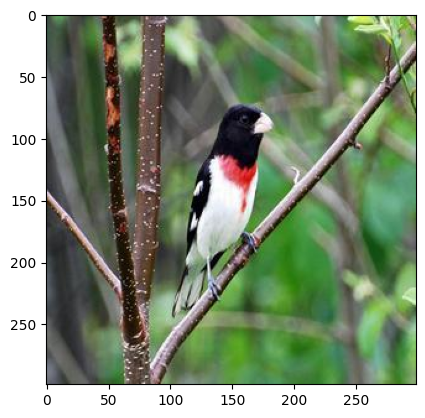

In [82]:
# Get the first batch of data
images_batch, labels_batch = next(train_generator)

# Get the first image and label
first_image = images_batch[0]
first_label = labels_batch[0]

# Print the first image and label
print("First image shape:", first_image.shape)
print("First label:", first_label)

# If you want to display the image
import matplotlib.pyplot as plt

plt.imshow(first_image)
plt.show()

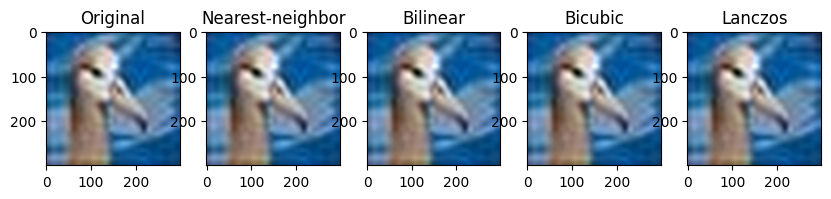

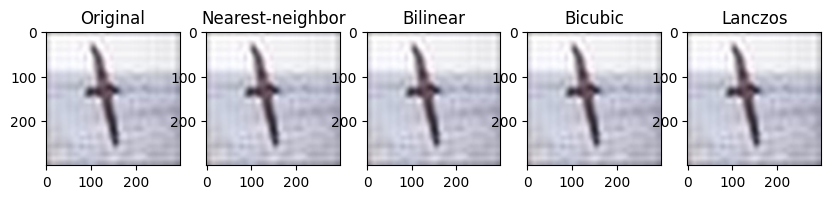

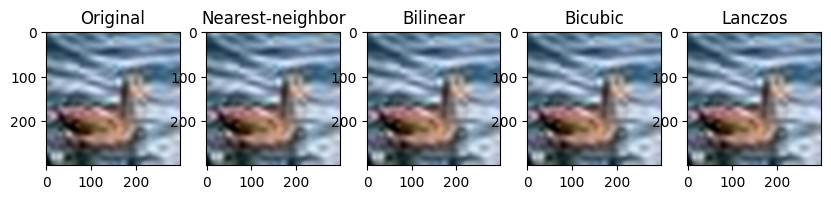

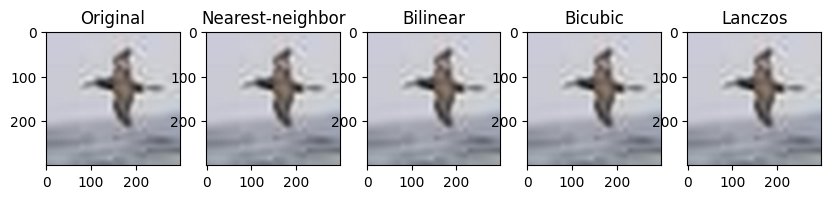

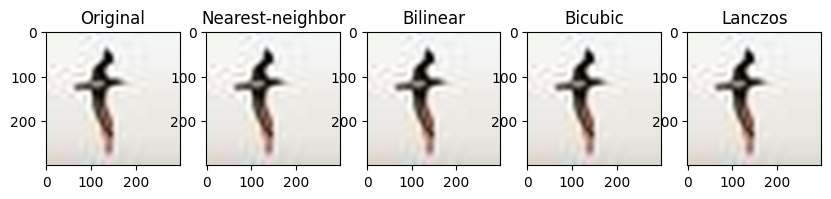

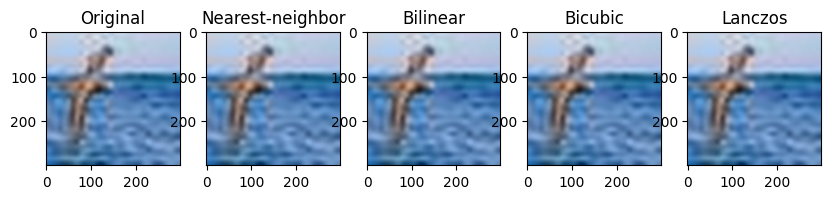

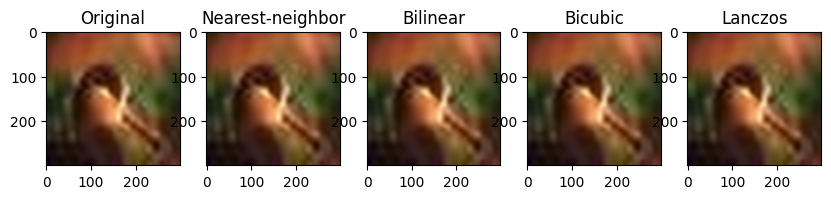

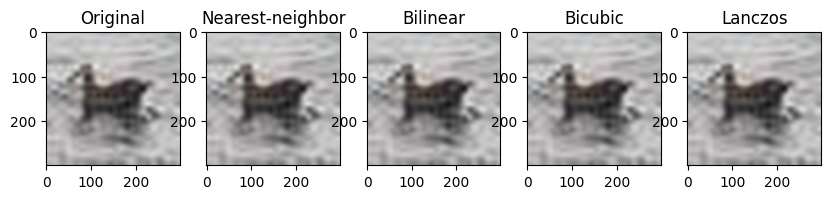

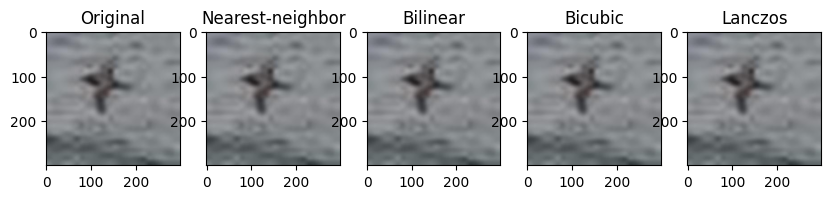

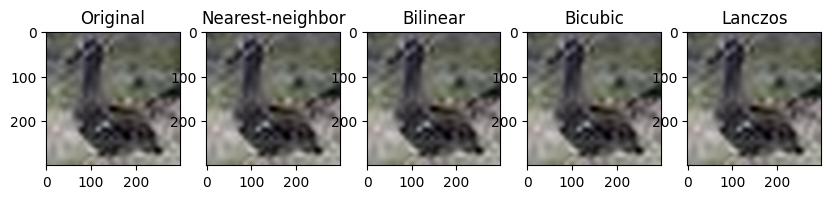

In [76]:
import matplotlib.pyplot as plt

# Path to the image directory
image_dir = 'CUB_200_2011/images/'

# Path to the text file with image filenames
image_file_path = 'CUB_200_2011/images.txt'

# Desired size
desired_size = (299, 299)

# Read the image filenames from the text file
with open(image_file_path, 'r') as f:
    lines = f.read().splitlines()

# Get the image filenames from the second column
image_files = [line.split(' ')[1] for line in lines]

# For each image file
for i, image_file in enumerate(image_files[:10]):
    # Open the image file
    with Image.open(os.path.join(image_dir, image_file)) as img:
        # Get the size of the image
        width, height = img.size

        # Create a new figure
        plt.figure(i, figsize=(10, 10))

        # Plot the original image
        plt.subplot(1, 5, 1)
        plt.imshow(img)
        plt.title('Original')

        # Plot the image resized with nearest-neighbor interpolation
        """Nearest-neighbor: This method is the fastest, but it can produce poor results when the size change is significant. It's not typically used when quality is important."""
        plt.subplot(1, 5, 2)
        plt.imshow(img.resize(desired_size, Image.NEAREST))
        plt.title('Nearest-neighbor')

        # Plot the image resized with bilinear interpolation
        """Bilinear: This method provides a good balance between speed and quality. It's often used for upscaling."""
        plt.subplot(1, 5, 3)
        plt.imshow(img.resize(desired_size, Image.BILINEAR))
        plt.title('Bilinear')

        # Plot the image resized with bicubic interpolation
        """Bicubic: This method is slower than bilinear interpolation but can produce smoother images. It's often used for downscaling."""
        plt.subplot(1, 5, 4)
        plt.imshow(img.resize(desired_size, Image.BICUBIC))
        plt.title('Bicubic')

        # Plot the image resized with lanczos interpolation
        """Lanczos: This method is the slowest but generally provides the best quality. It's often used when quality is more important than speed."""
        plt.subplot(1, 5, 5)
        plt.imshow(img.resize(desired_size, Image.LANCZOS))
        plt.title('Lanczos')

        # Show the plot
        plt.show()

In [81]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(299, 299, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(200, activation='softmax')
])

# Use a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3,
    restore_best_weights=True)

history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_dataset,
    validation_steps=validation_steps,
    epochs=50,
    callbacks=[early_stopping]
)

test_loss, test_acc = model.evaluate(test_dataset, steps=test_steps)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


/Users/matthewdulcich/Documents/DevProjects/Machine Learning Projects/Image-Classification-Transfer-Learning/python-venv311/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 120s 403ms/step - accuracy: 0.0029 - loss: 92.4405 - val_accuracy: 0.0026 - val_loss: 10.8144
Epoch 2/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 117s 397ms/step - accuracy: 0.0044 - loss: 8.9657 - val_accuracy: 8.5985e-04 - val_loss: 6.1210
Epoch 3/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 116s 395ms/step - accuracy: 0.0074 - loss: 5.8441 - val_accuracy: 8.5985e-04 - val_loss: 5.4416
Epoch 4/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 116s 394ms/step - accuracy: 0.0064 - loss: 5.3846 - val_accuracy: 8.5985e-04 - val_loss: 5.3359
Epoch 5/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 116s 396ms/step - accuracy: 0.0062 - loss: 5.3138 - val_accuracy: 8.5985e-04 - val_loss: 5.3207
Epoch 6/50
218/294 ━━━━━━━━━━━━━━━━━━━━ 28s 373ms/step - accuracy: 0.0073 - loss: 5.3037

KeyboardInterrupt: 

In [57]:
if tf.data.experimental.cardinality(train_dataset) == tf.data.experimental.INFINITE_CARDINALITY:
    print("The dataset is infinitely repeating")
else:
    print("The dataset is not infinitely repeating")

The dataset is not infinitely repeating


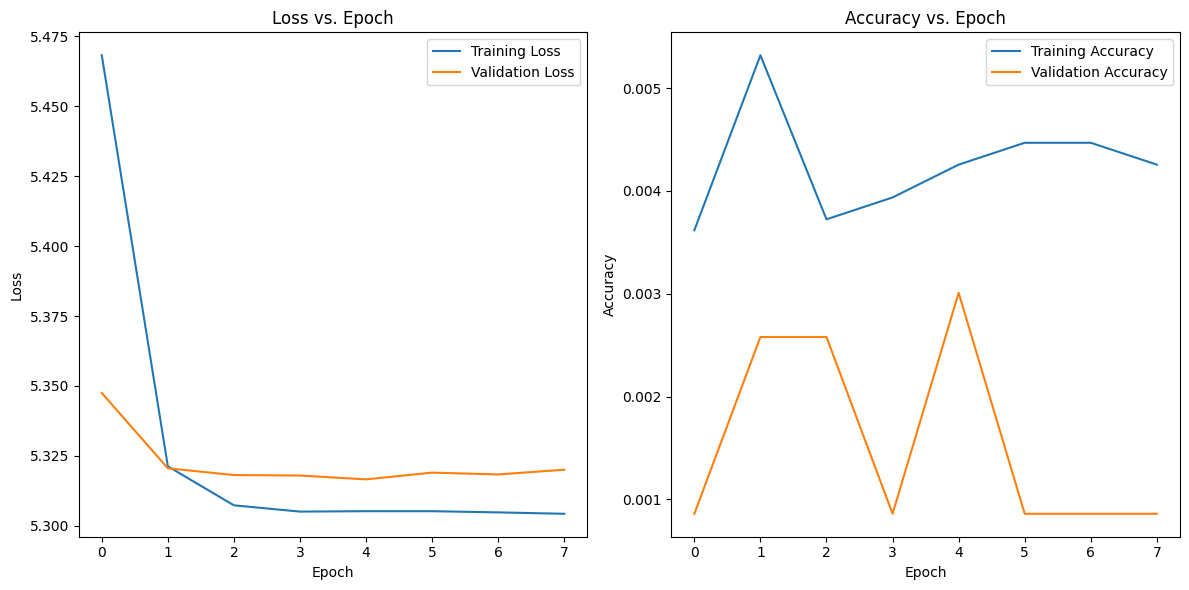

In [72]:
import matplotlib.pyplot as plt

# Get the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()
